In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
train = pd.read_csv ("/kaggle/input/titanic/train.csv")
train.head(20)
#train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
# test.shape
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
all1 = [train,test]

print(train.info())
print ("_"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pass

In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
#Label summarize in Cabin feature
train.groupby(['Cabin']).size().sort_values(ascending=False)

Cabin
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Length: 147, dtype: int64

In [7]:
#Label summarize in Ticket feature
train.groupby(['Ticket']).size().sort_values(ascending=False)

Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
345572      1
345364      1
343276      1
343275      1
347464      1
Length: 681, dtype: int64

In [8]:
#Features with NULL values
print(train.isnull().sum())
print("_"*10)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
__________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### **FEATURE ENGINEERING**

To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against Survived feature.


### **1. Pclass**

In [9]:
#Pivoting Features (Correlations) Pclass vs Survived 
train[['Pclass','Survived']].groupby(by='Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### **2. Sex**

In [10]:
#Pivoting Features (Correlation) Sex vs Survived
train[['Sex','Survived']].groupby(['Sex']).mean().sort_values(['Survived'], ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


### **3. SibSp and Parch**


With the number of siblings/spouse and the number of children/parents we can create new feature called Family Size.


In [11]:
#Creating FamilySize (SibSp+Parch) and Pivoting Features (Correlations) FamilySize vs Survived 
for dataset in all1:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']

train[['FamilySize','Survived']].groupby(['FamilySize']).mean().sort_values(['Survived'], ascending=False)


,Survived
FamilySize,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.303538
4,0.200000
5,0.136364
7,0.000000
10,0.000000


In [12]:
#Creating a binary variable IsAlone from FamilySize
for dataset in all1:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train[['IsAlone','Survived']].groupby(['IsAlone']).mean().sort_values(['Survived'], ascending=False)


,Survived
IsAlone,
1,0.552795
0,0.346575


### **4. Embarked**
Embarked feature has some missing values and we replace them with mode ( 'S' )

In [13]:
for dataset in all1:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

train[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(['Survived'], ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


### **5. Fare**
Fare also has some missing values and we replace them with median. Then we categorize Fare in 4 ranges or bins using 'qcut' that sets ranges with same number of values in each one.

In [14]:
for dataset in all1:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
    dataset['FareCat'] = pd.qcut(dataset['Fare'],4)
train[['FareCat','Survived']].groupby(['FareCat']).mean().sort_values(['Survived'],ascending=False)

,Survived
FareCat,
"(31.0, 512.329]",0.581081
"(14.454, 31.0]",0.454955
"(7.91, 14.454]",0.303571
"(-0.001, 7.91]",0.197309


### **6. Age**
This feature has plenty of missing values. In order to complete them we generate random numbers between (mean +- std) and then we categorize age in 5 ranges using 'cut' (ranges with same lenth each one)

In [15]:
#Complete
for dataset in all1:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg-age_std,age_avg+age_std, size = age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age']=dataset['Age'].astype(int)

#Categorize
    dataset['AgeCat'] = pd.cut(dataset['Age'],5)

#Correlation AgeCat vs Survive
train[['AgeCat','Survived']].groupby(['AgeCat']).mean().sort_values(['Survived'], ascending=False)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived
AgeCat,
"(-0.08, 16.0]",0.500000
"(48.0, 64.0]",0.434783
"(16.0, 32.0]",0.372460
"(32.0, 48.0]",0.351562
"(64.0, 80.0]",0.090909


### **7. Name**
We can extract relevant information from titles in Name feature

In [16]:
#Extracting Title from Name and creating a new feature
for dataset in all1:
       dataset['Title']= dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
#Correlation Title vs Survive
train[['Title','Survived']].groupby(['Title']).mean().sort_values(['Survived'], ascending=False)

,Survived
Title,
Sir,1.000000
Countess,1.000000
Ms,1.000000
Mme,1.000000
Lady,1.000000
Mlle,1.000000
Mrs,0.792000
Miss,0.697802
Master,0.575000


In [18]:
#Categorize Title and label the uncommon ones as Rare (less than 10)
for dataset in all1:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

#Correlation Title vs Survive
train[['Title','Survived']].groupby(['Title']).mean().sort_values(['Survived'],ascending=False)


,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,FareCat,AgeCat,Title
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,0,0,"(-0.001, 7.896]","(30.4, 45.6]",Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,1,1,"(-0.001, 7.896]","(45.6, 60.8]",Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,0,0,"(7.896, 14.454]","(60.8, 76.0]",Mr
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,0,0,"(7.896, 14.454]","(15.2, 30.4]",Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,2,0,"(7.896, 14.454]","(15.2, 30.4]",Mrs


### **ENCODING CATEGORICAL FEATURES**
Featrues with categorical values are encoded using Label Encoding from Sklearn (OrdinalEncoder for features and LabelEncoder for target)

In [20]:
enc = OrdinalEncoder()

for dataset in all1:
    dataset[['SexEnc']] = enc.fit_transform(dataset[['Sex']])
    dataset[['EmbarkedEnc']] = enc.fit_transform(dataset[['Embarked']])
    dataset[['FareEnc']] = enc.fit_transform(dataset[['FareCat']])
    dataset[['AgeEnc']] = enc.fit_transform(dataset[['AgeCat']])
    dataset[['TitleEnc']] = enc.fit_transform(dataset[['Title']])


### **FEATURE SELECTION**

In [21]:
selected_features = ['Pclass', 'IsAlone', 'SexEnc', 'EmbarkedEnc','FareEnc','AgeEnc', 'TitleEnc']
X = train[selected_features].values
testxy = test [selected_features].values

y = train ['Survived'].values

X.shape,y.shape, testxy.shape

((891, 7), (891,), (418, 7))

In [22]:
#Check NULL values in features
print (train[selected_features].info())
print("-"*10)
print (test[selected_features].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   IsAlone      891 non-null    int64  
 2   SexEnc       891 non-null    float64
 3   EmbarkedEnc  891 non-null    float64
 4   FareEnc      891 non-null    float64
 5   AgeEnc       891 non-null    float64
 6   TitleEnc     891 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 48.9 KB
None
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   IsAlone      418 non-null    int64  
 2   SexEnc       418 non-null    float64
 3   EmbarkedEnc  418 non-null    float64
 4   FareEnc      418 non-null    float64
 5   AgeEnc       418 non-null    float64
 6   TitleE

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

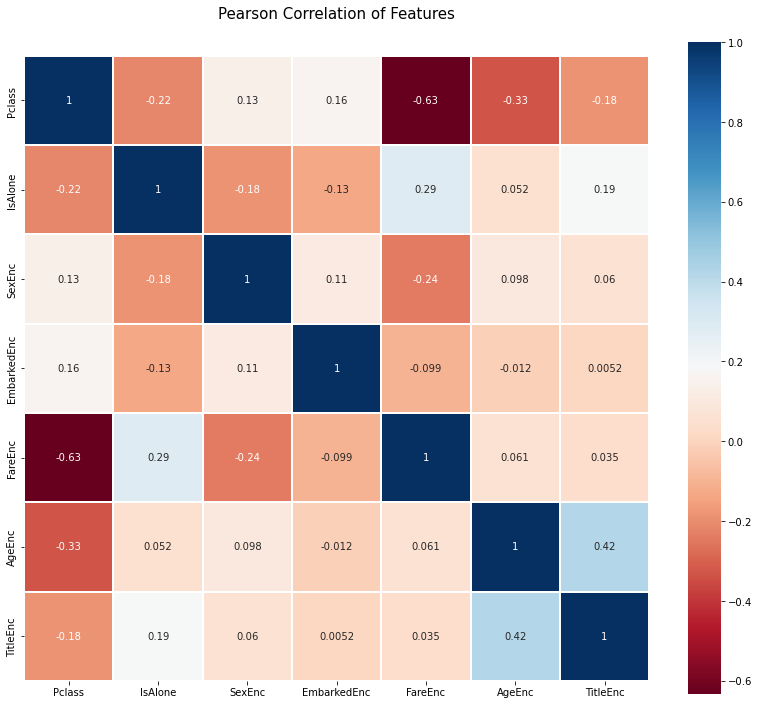

In [23]:
#Pearson Correlation Heatmap

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train[selected_features].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

### **MODEL BUILDING**

In [24]:
#Train & Test data spliting
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, random_state = 1)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((534, 7), (357, 7), (534,), (357,))

In [25]:
#Suport Vector Machines Model and training
clf = SVC ()
clf.fit(Xtrain, ytrain)

SVC()

In [26]:
#Evaluation - accuracy
predict = clf.predict(Xtest)
accuracy = accuracy_score(ytest, predict)
accuracy

0.7815126050420168

In [27]:
# #ExtraTreesClassifier to extract the most important features
# forest = ExtraTreesClassifier()
# forest.fit(Xtrain, ytrain)
# important = forest.feature_importances_
# important

In [28]:
# #New dataset dropping IsAlone (1) and EmbarkedEnc (3)
# Xtrain2 = Xtrain[:,[0,2,4,5,6]]
# Xtest2 = Xtest[:,[0,2,4,5,6]] 

# Xtrain2.shape, Xtest2.shape, ytrain.shape, ytest.shape

In [29]:
# #New Suport Vector Machines Model and training
# clf = SVC ()
# clf.fit(Xtrain2, ytrain)

# #New Evaluation - accuracy
# predict2 = clf.predict(Xtest2)
# accuracy2 = accuracy_score(ytest, predict2)
# accuracy2


Same resul than the first SVM model. Let's keep our first approach (and comment 2nd one)

In [30]:
#Submission
clf = SVC ()
clf.fit(Xtrain, ytrain)
final_prediction = clf.predict(testxy)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': final_prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
